In [16]:
import pandas as pd 
data={
    "review": [
        "I love this product! It works perfectly.",
        "Terrible quality, broke after one use.",
        "Excellent performance, worth the price!",
        "Not satisfied, waste of money.",
        "Good product, but delivery was slow.",
        "Awful experience. Will never buy again."
    ],
    "sentiment": [1, 0, 1, 0, 1, 0]  # 1 for positive, 0 for negative
}

df=pd.DataFrame(data)

TEXT PREPROCESSING FUNCTION

In [17]:
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
def preprocess_text(text):
    text=re.sub(r"[^a-zA-Z]","",text.lower())
    words=nltk.word_tokenize(text)
    # remove stopwords and apply stemming
    stop_words=set(stopwords.words("english"))
    stemmer=PorterStemmer()
    words=[stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

#Apply preprocessing
df["processed_review"]=df["review"].apply(preprocess_text)

from sklearn.model_selection import train_test_split
# splitting
xtrain,xtest,ytrain,ytest=train_test_split(df["processed_review"],df["sentiment"],test_size=0.2,random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
# vectorize text data
vectorizer=CountVectorizer()
xtrain_vec=vectorizer.fit_transform(xtrain)
xtest_vec=vectorizer.transform(xtest)

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain_vec,ytrain)

y_pred=model.predict(xtest_vec)

from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(ytest,y_pred))





Accuracy: 0.5


GENERATE WORD CLOUDS FOR +VE & -VE REVIEW

In [18]:
from wordcloud import WordCloud
positive_reviews=" ".join(df[df["sentiment"]==1]["processed_review"])
negative_reviews=" ".join(df[df["sentiment"]==0]["processed_review"])

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_reviews)




DISPLAY WORD CLOUD

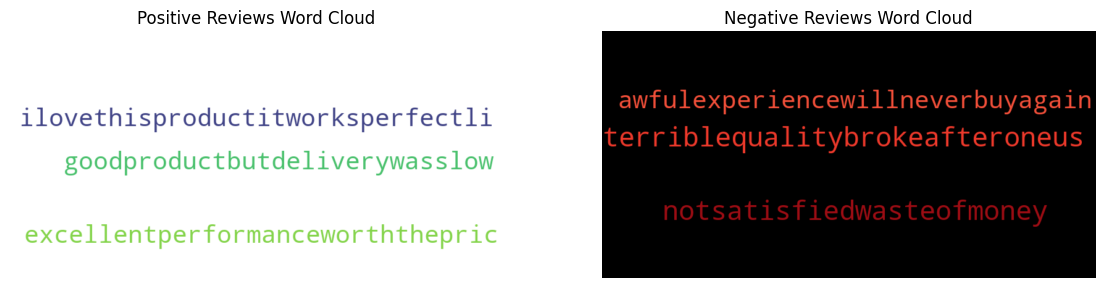

In [19]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()
